Aaccess  the  wine  datafrom  the  UCI  machine  learning  repository(https://archive.ics.uci.edu/ml/datasets/wine).    These  data  are  the  results  of  a chemical  analysis  of  178  wines  grown  over  the  decade  1970-1979  in  the  same region  of  Italy,  but  derived  from three  different  cultivars  (Barolo,  Grignolino, Barbera).    The  Babera  wines  were  predominately  from  a  period  that  was  much later  than  that  of  the  Barolo  and  Grignolino  wines.    The  analysis  determined  the quantities  MalicAcid,  Ash,  AlcAsh,  Mg,  Phenols,  Proa,Color,  Hue,  OD,  and Proline.  There are 50 Barolo wines, 71 Grignolino wines, and 48 Barbera wines. <br>  Construct  the  appropriate size  classification  tree  for  this dataset.    
How  many testing  samples  fall  into  each  node? <br>   Describe  the  resulting  tree  and  your approach. 

In [7]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression , LogisticRegression 
from sklearn.tree import DecisionTreeClassifier, export_graphviz

from sklearn.externals.six import StringIO  
from IPython.display import Image   
import pydotplus

In [8]:
df = pd.read_csv('wine.csv', delimiter=",") 

In [9]:
column_list = []
for i in range(1 ,len(df.columns) +1):
    column_list.append("Column" + str(i)) 
wine_data = pd.read_csv('wine.csv', delimiter=",", names=column_list) 

In [10]:
wine_data

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,Column12,Column13,Column14
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [11]:
# SPLIT TRAIN TEST
wine_target = wine_data.Column1
wine_target

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: Column1, Length: 178, dtype: int64

In [12]:
wine_predictor = wine_data.drop("Column1", axis = 1)
wine_predictor

,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,Column12,Column13,Column14
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [13]:
predictor_train,predictor_test,target_train,target_test=train_test_split(wine_predictor,wine_target,test_size=0.2)

In [14]:
dtree=DecisionTreeClassifier()
dtree.fit(wine_predictor,wine_target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

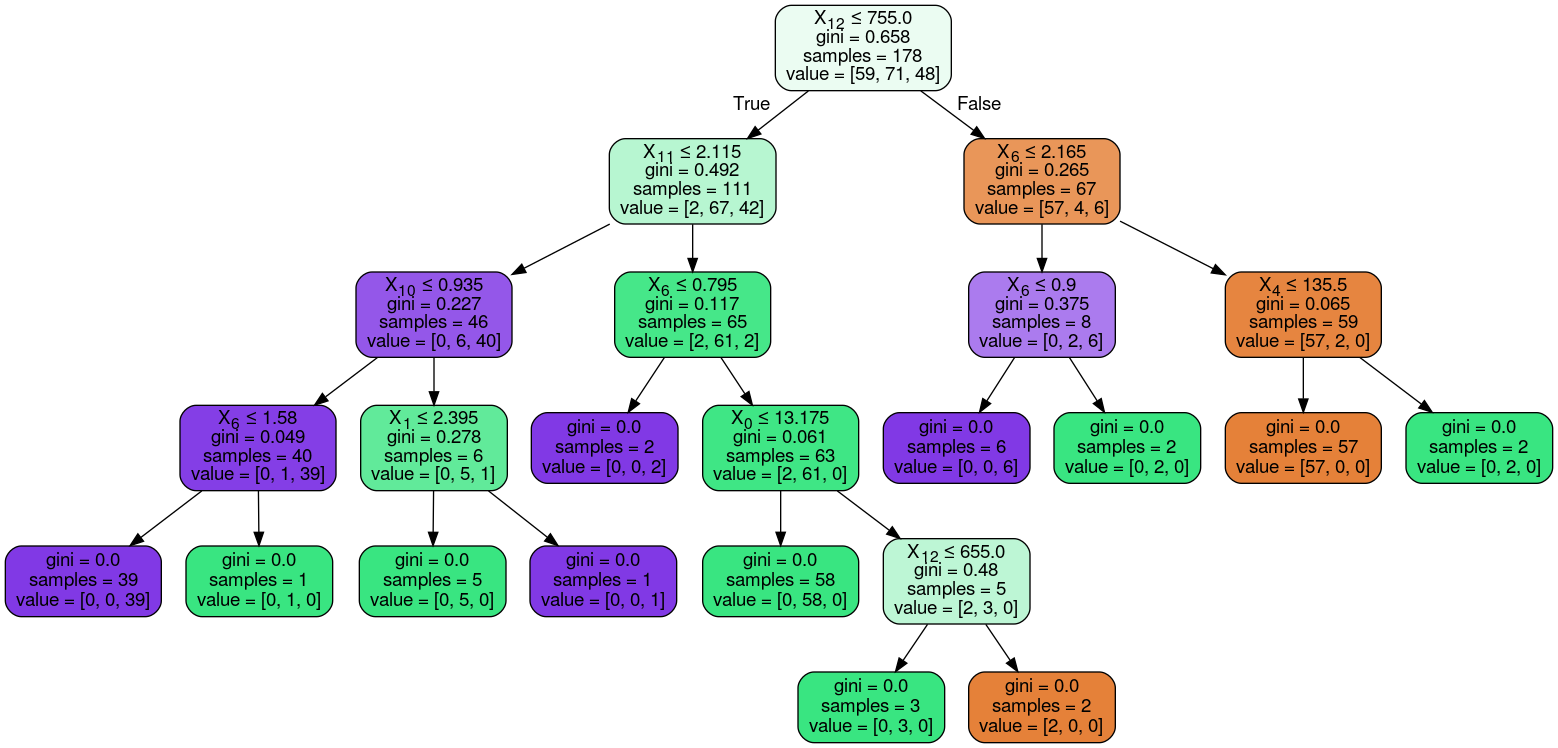

In [16]:
# dot_data = StringIO()
def jupyter_graphviz(m, **kwargs):
    dot_data = StringIO() 
    export_graphviz(m, dot_data, **kwargs)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#     graph.save("img1.png","PNG")
    display(Image(graph.create_png()))
    
jupyter_graphviz(dtree, filled=True, rounded=True, special_characters=True)